In [675]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [676]:
data = pd.read_csv('scopus (4).csv')

In [677]:
data2 = pd.read_csv('scopus (5).csv')

In [678]:
data = pd.concat([data, data2], ignore_index = True)

In [679]:
data.drop_duplicates(subset=['Title'], inplace = True)

In [850]:
len(data)

2051

In [681]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [682]:
sorted_by_year = data.groupby('Year').agg({'Year': 'count'})

In [683]:
sorted_by_year.rename(columns={
    'Year':'Publication count'
},inplace=True)

In [684]:
sorted_by_year.reset_index(inplace=True)

In [685]:
sorted_by_year

,Year,Publication count
0,2010,58
1,2011,64
2,2012,71
3,2013,77
4,2014,81
5,2015,96
6,2016,119
7,2017,145
8,2018,196
9,2019,298


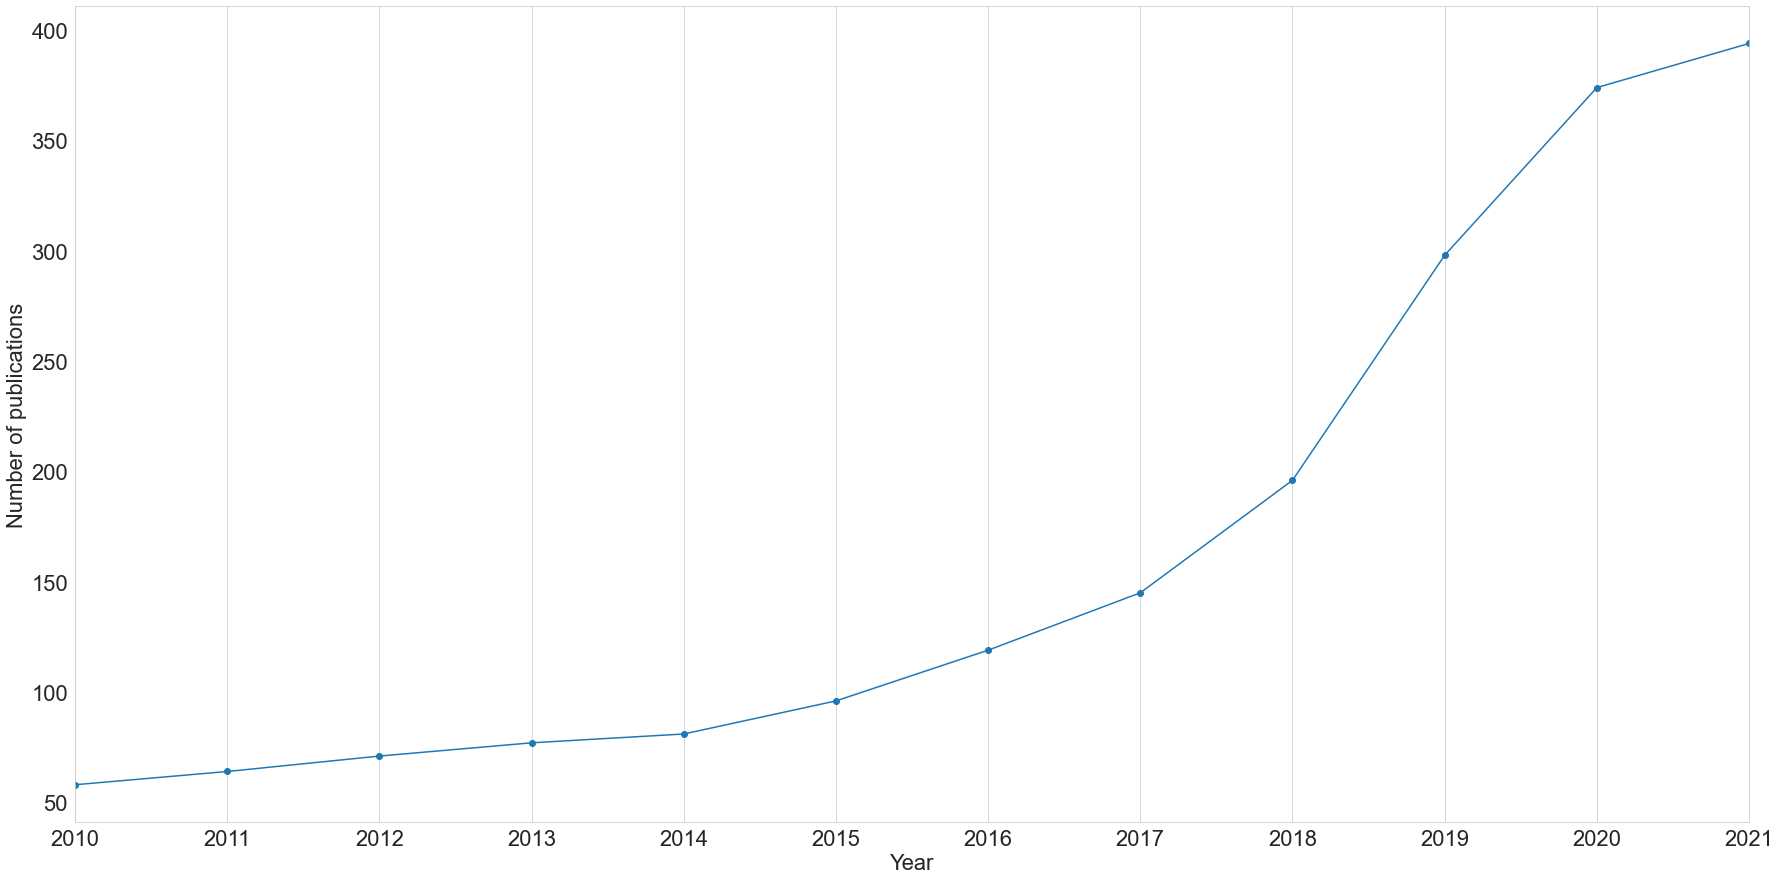

In [739]:
fig, ax = plt.subplots(1, 1,figsize=(30,15))

plt.rcParams.update({'font.size': 40})
plt.plot(sorted_by_year['Year'], sorted_by_year['Publication count'])
plt.grid( which='major', axis='y')
plt.scatter(sorted_by_year['Year'],sorted_by_year['Publication count'])
plt.xlabel('Year')
plt.ylabel('Number of publications')
ax.set_xlim(2010, max(sorted_by_year['Year'])-1)
plt.xticks(np.arange(min(sorted_by_year['Year']), max(sorted_by_year['Year']), 1.0))
plt.savefig('fig1.jpg')
plt.show()


In [687]:
top_source= data.groupby('Source title').agg({'Year': 'count'})

In [688]:
top_source.rename(columns={
    'Year':'Publication count'
},inplace=True)

In [689]:
top_source.reset_index().sort_values(by=['Publication count'],ascending=False).head(15)

,Source title,Publication count
494,Lecture Notes in Computer Science (including s...,200
215,CEUR Workshop Proceedings,104
160,ACM International Conference Proceeding Series,58
231,Communications in Computer and Information Sci...,56
176,Advances in Intelligent Systems and Computing,31
326,IEEE Access,28
432,Journal of Biomedical Informatics,24
157,ACL-IJCNLP 2021 - 59th Annual Meeting of the A...,21
373,International Conference Recent Advances in Na...,20
465,Journal of Physics: Conference Series,16


In [690]:
top_15_source=top_source.reset_index().sort_values(by=['Publication count'],ascending=False).head(15)['Source title']

In [691]:
top_15_source.reset_index(drop=True, inplace=True)

In [692]:
top_15_source

0     Lecture Notes in Computer Science (including s...
1                             CEUR Workshop Proceedings
2        ACM International Conference Proceeding Series
3     Communications in Computer and Information Sci...
4         Advances in Intelligent Systems and Computing
5                                           IEEE Access
6                     Journal of Biomedical Informatics
7     ACL-IJCNLP 2021 - 59th Annual Meeting of the A...
8     International Conference Recent Advances in Na...
9                 Journal of Physics: Conference Series
10                                   BMC Bioinformatics
11                            Procedia Computer Science
12                       Applied Sciences (Switzerland)
13                                       Bioinformatics
14    Proceedings of the Annual Conference of the In...
Name: Source title, dtype: object

In [693]:
sorted_by_source = data.groupby(['Year','Source title']).agg({'Year': 'count'})

In [694]:
sorted_by_source.rename(columns={
    'Year':'Publication count'
},inplace=True)

In [695]:
sorted_by_source.reset_index(inplace=True)

In [761]:
sorted_by_source[sorted_by_source['Source title']==top_15_source[4]]

,Year,Source title,Publication count
191,2014,Advances in Intelligent Systems and Computing,4
250,2015,Advances in Intelligent Systems and Computing,1
401,2017,Advances in Intelligent Systems and Computing,2
496,2018,Advances in Intelligent Systems and Computing,7
613,2019,Advances in Intelligent Systems and Computing,2
770,2020,Advances in Intelligent Systems and Computing,9
947,2021,Advances in Intelligent Systems and Computing,6


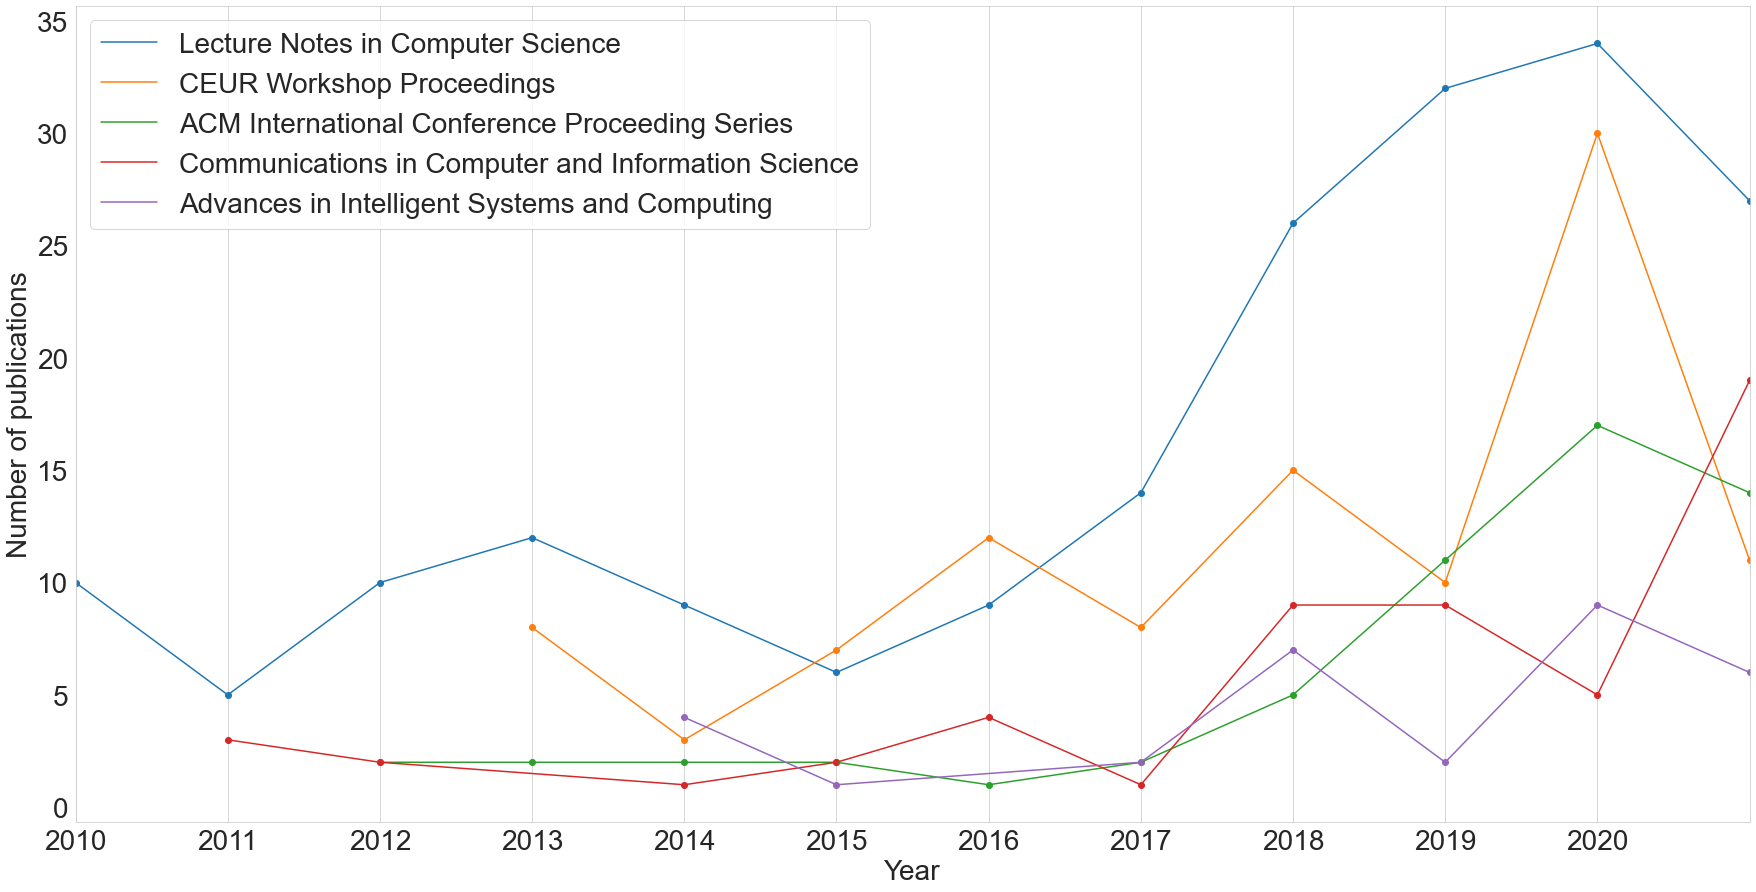

In [752]:
fig, ax = plt.subplots(1, 1,figsize=(30,15))

plt.rcParams.update({'font.size': 28})

plt.plot(sorted_by_source[sorted_by_source['Source title']==top_15_source[0]]['Year'], sorted_by_source[sorted_by_source['Source title']==top_15_source[0]]['Publication count'],label='Lecture Notes in Computer Science')
plt.grid( which='major', axis='y')
plt.scatter(sorted_by_source[sorted_by_source['Source title']==top_15_source[0]]['Year'], sorted_by_source[sorted_by_source['Source title']==top_15_source[0]]['Publication count'])

plt.plot(sorted_by_source[sorted_by_source['Source title']==top_15_source[1]]['Year'], sorted_by_source[sorted_by_source['Source title']==top_15_source[1]]['Publication count'],label=top_15_source[1])
plt.grid( which='major', axis='y')
plt.scatter(sorted_by_source[sorted_by_source['Source title']==top_15_source[1]]['Year'], sorted_by_source[sorted_by_source['Source title']==top_15_source[1]]['Publication count'])


plt.plot(sorted_by_source[sorted_by_source['Source title']==top_15_source[2]]['Year'], sorted_by_source[sorted_by_source['Source title']==top_15_source[2]]['Publication count'],label=top_15_source[2])
plt.grid( which='major', axis='y')
plt.scatter(sorted_by_source[sorted_by_source['Source title']==top_15_source[2]]['Year'], sorted_by_source[sorted_by_source['Source title']==top_15_source[2]]['Publication count'])


plt.plot(sorted_by_source[sorted_by_source['Source title']==top_15_source[3]]['Year'], sorted_by_source[sorted_by_source['Source title']==top_15_source[3]]['Publication count'],label=top_15_source[3])
plt.grid( which='major', axis='y')
plt.scatter(sorted_by_source[sorted_by_source['Source title']==top_15_source[3]]['Year'], sorted_by_source[sorted_by_source['Source title']==top_15_source[3]]['Publication count'])


plt.plot(sorted_by_source[sorted_by_source['Source title']==top_15_source[4]]['Year'], sorted_by_source[sorted_by_source['Source title']==top_15_source[4]]['Publication count'],label=top_15_source[4])
plt.grid( which='major', axis='y')
plt.scatter(sorted_by_source[sorted_by_source['Source title']==top_15_source[4]]['Year'], sorted_by_source[sorted_by_source['Source title']==top_15_source[4]]['Publication count'])





plt.legend(loc='upper left', 
           #bbox_to_anchor=(0.5, -0.05),
          #fancybox=True, shadow=True,
           ncol=1)

plt.xlabel('Year')
plt.ylabel('Number of publications')
ax.set_xlim(2010, 2021)
plt.xticks(np.arange(2010, 2021, 1.0))
plt.savefig('fig2.jpg')
plt.show()

In [698]:
data['#abstract']=data['Abstract'].apply(lambda x : len(x.replace(' ','').replace('-','').replace('.','').replace(',','')))

In [699]:
data

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Text 1,Funding Text 2,Funding Text 3,Funding Text 4,Funding Text 5,Funding Text 6,Funding Text 7,Funding Text 8,Funding Text 9,Funding Text 10,Correspondence Address,Editors,Publisher,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,#abstract
0,"Lample G., Ballesteros M., Subramanian S., Kaw...",57156540200;36602042900;57208438753;5720089227...,Neural architectures for named entity recognition,2016,2016 Conference of the North American Chapter ...,NaN,NaN,NaN,260,270,NaN,1501.0,10.18653/v1/n16-1030,https://www.scopus.com/inward/record.uri?eid=2...,"Carnegie Mellon University, United States; NLP...","Lample, G., Carnegie Mellon University, United...",State-of-the-art named entity recognition syst...,NaN,Computational linguistics; Conditional random ...,HR0011-15-C-0114; Defense Advanced Research Pr...,This work was sponsored in part by the Defense...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Association for Computational Linguistics (ACL),NaN,9781941643914,NaN,NaN,English,Conf. North Am. Chapter Assoc. Comput. Linguis...,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84994130883,729
1,"Ritter A., Sam C., Mausam, Etzioni O.",34880667100;57199136247;55963402300;7004312379;,Named entity recognition in tweets: An experim...,2011,EMNLP 2011 - Conference on Empirical Methods i...,NaN,NaN,NaN,1524,1534,NaN,832.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,"Computer Science and Engineering, University o...","Ritter, A., Computer Science and Engineering, ...",People tweet more than 100 Million times daily...,NaN,Co-training; Experimental studies; Named-entit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ritter, A.; Computer Science and Engineering, ...",NaN,NaN,NaN,1937284115; 9781937284114,NaN,NaN,English,EMNLP - Conf. Empir. Methods Nat. Lang. Proces...,Conference Paper,Final,NaN,Scopus,2-s2.0-80053238545,658
2,"Habibi M., Weber L., Neves M., Wiegandt D.L., ...",55406762500;57194978942;36028246200;5719103185...,Deep learning with word embeddings improves bi...,2017,Bioinformatics,33,14,NaN,i37,i48,NaN,270.0,10.1093/bioinformatics/btx228,https://www.scopus.com/inward/record.uri?eid=2...,"Computer Science Department, Humboldt-Universi...","Habibi, M., Computer Science Department, Humbo...",Motivation: Text mining has become an importan...,NaN,animal; data mining; human; machine learning; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Habibi, M.; Computer Science Department, Germa...",NaN,Oxford University Press,13674803,NaN,BOINF,28881963.0,English,Bioinformatics,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-85024496142,1126
3,"Derczynski L., Maynard D., Rizzo G., Van Erp M...",55668121600;8704767900;57194127652;56458465100...,Analysis of named entity recognition and linki...,2015,Information Processing and Management,51,2,NaN,32,49,NaN,223.0,10.1016/j.ipm.2014.10.006,https://www.scopus.com/inward/record.uri?eid=2...,"University of Sheffield, Sheffield, S1 4DP, Un...","Derczynski, L., University of Sheffield, Sheff...",Applying natural language processing for minin...,Entity disambiguation; Information extraction;...,Computational linguistics; Data mining; Inform...,"Seventh Framework Programme, FP7: 287863, 2879...",This work was partially supported by the UK EP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Derczynski, L.; University of SheffieldUnited ...",NaN,Elsevier Ltd,03064573,NaN,IPMAD,NaN,English,Inf. Process. Manage.,Article,Final,"All Open Access, Green",Scopus,2-s2.0-84911496552,791
4,"Luo G., Huang X., Lin C.-Y., Nie Z.",57155694200;56350020800;23009406500;12141324400;,Joint named entity recognition and disambiguation,2015,Conference Proceedings - EMNLP 201

In [700]:
data['Authors with affiliations'][0]

'Lample, G., Carnegie Mellon University, United States; Ballesteros, M., Carnegie Mellon University, United States, NLP Group, Pompeu Fabra University, Spain; Subramanian, S., Carnegie Mellon University, United States; Kawakami, K., Carnegie Mellon University, United States; Dyer, C., Carnegie Mellon University, United States'

In [701]:
data['#Title']=data['Title'].apply(lambda x : len(x.replace(' ','').replace('-','').replace('.','').replace(',','')))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


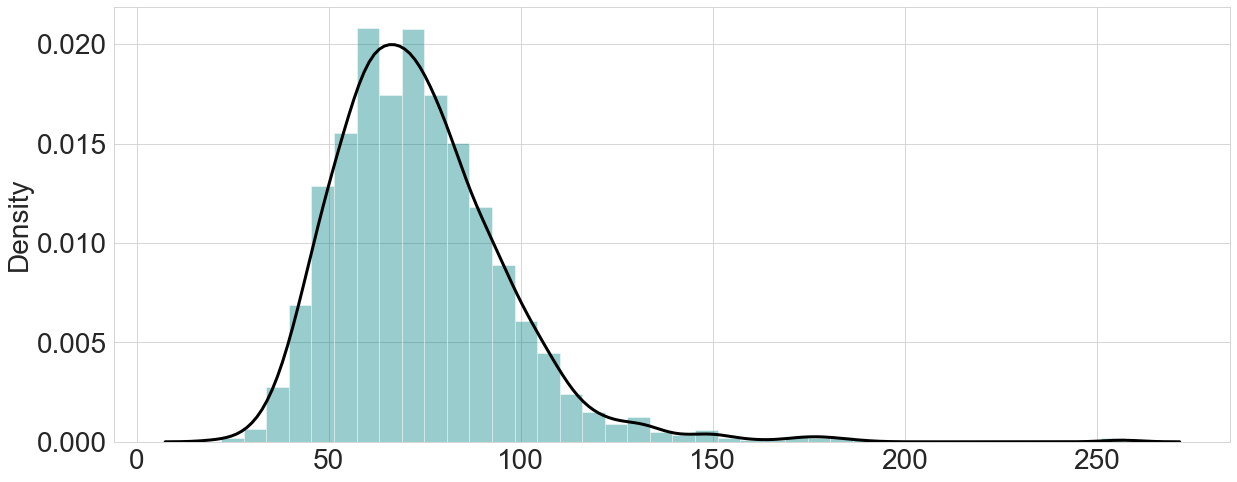

In [870]:

 

sb.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (20,8)) #Specify the size of figure we want(Optional)
sb.distplot(x = data['#Title']  ,  bins = 40 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 3 , color = 'black'))
plt.savefig('fig3.jpg')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


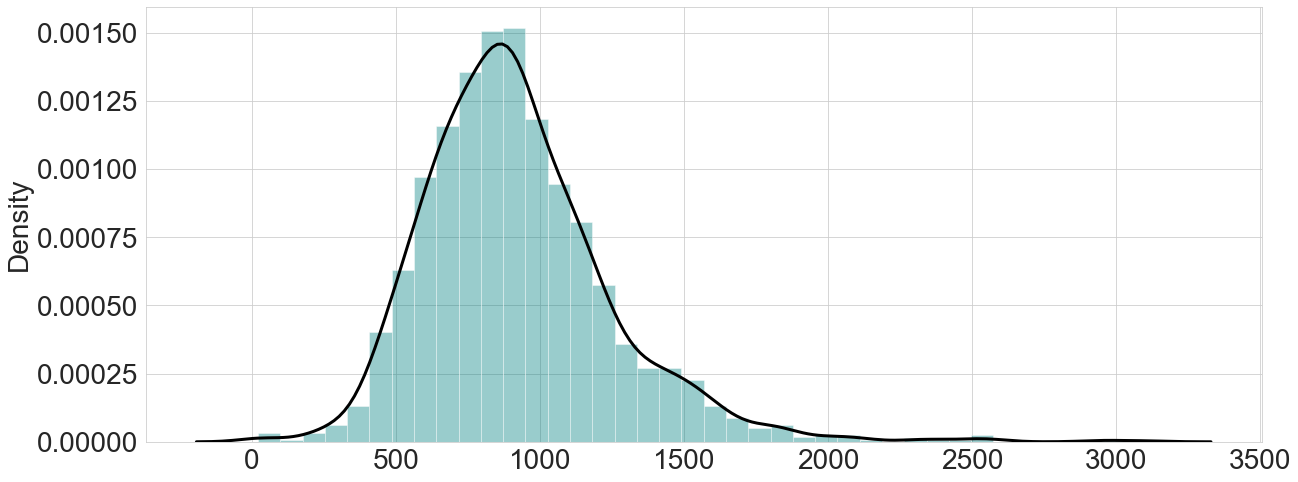

In [871]:

sb.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (20,8)) #Specify the size of figure we want(Optional)
sb.distplot(x = data['#abstract']  ,  bins = 40 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 3 , color = 'black'))
plt.savefig('fig4.jpg')
plt.show()

In [704]:
top100_publications=data.sort_values(by=['Cited by'],ascending=False).head(100)

In [705]:
top100_publications

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Text 1,Funding Text 2,Funding Text 3,Funding Text 4,Funding Text 5,Funding Text 6,Funding Text 7,Funding Text 8,Funding Text 9,Funding Text 10,Correspondence Address,Editors,Publisher,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,#abstract,#Title
0,"Lample G., Ballesteros M., Subramanian S., Kaw...",57156540200;36602042900;57208438753;5720089227...,Neural architectures for named entity recognition,2016,2016 Conference of the North American Chapter ...,NaN,NaN,NaN,260,270,NaN,1501.0,10.18653/v1/n16-1030,https://www.scopus.com/inward/record.uri?eid=2...,"Carnegie Mellon University, United States; NLP...","Lample, G., Carnegie Mellon University, United...",State-of-the-art named entity recognition syst...,NaN,Computational linguistics; Conditional random ...,HR0011-15-C-0114; Defense Advanced Research Pr...,This work was sponsored in part by the Defense...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Association for Computational Linguistics (ACL),NaN,9781941643914,NaN,NaN,English,Conf. North Am. Chapter Assoc. Comput. Linguis...,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84994130883,729,44
1,"Ritter A., Sam C., Mausam, Etzioni O.",34880667100;57199136247;55963402300;7004312379;,Named entity recognition in tweets: An experim...,2011,EMNLP 2011 - Conference on Empirical Methods i...,NaN,NaN,NaN,1524,1534,NaN,832.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,"Computer Science and Engineering, University o...","Ritter, A., Computer Science and Engineering, ...",People tweet more than 100 Million times daily...,NaN,Co-training; Experimental studies; Named-entit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ritter, A.; Computer Science and Engineering, ...",NaN,NaN,NaN,1937284115; 9781937284114,NaN,NaN,English,EMNLP - Conf. Empir. Methods Nat. Lang. Proces...,Conference Paper,Final,NaN,Scopus,2-s2.0-80053238545,658,50
2,"Habibi M., Weber L., Neves M., Wiegandt D.L., ...",55406762500;57194978942;36028246200;5719103185...,Deep learning with word embeddings improves bi...,2017,Bioinformatics,33,14,NaN,i37,i48,NaN,270.0,10.1093/bioinformatics/btx228,https://www.scopus.com/inward/record.uri?eid=2...,"Computer Science Department, Humboldt-Universi...","Habibi, M., Computer Science Department, Humbo...",Motivation: Text mining has become an importan...,NaN,animal; data mining; human; machine learning; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Habibi, M.; Computer Science Department, Germa...",NaN,Oxford University Press,13674803,NaN,BOINF,28881963.0,English,Bioinformatics,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-85024496142,1126,70
3,"Derczynski L., Maynard D., Rizzo G., Van Erp M...",55668121600;8704767900;57194127652;56458465100...,Analysis of named entity recognition and linki...,2015,Information Processing and Management,51,2,NaN,32,49,NaN,223.0,10.1016/j.ipm.2014.10.006,https://www.scopus.com/inward/record.uri?eid=2...,"University of Sheffield, Sheffield, S1 4DP, Un...","Derczynski, L., University of Sheffield, Sheff...",Applying natural language processing for minin...,Entity disambiguation; Information extraction;...,Computational linguistics; Data mining; Inform...,"Seventh Framework Programme, FP7: 287863, 2879...",This work was partially supported by the UK EP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Derczynski, L.; University of SheffieldUnited ...",NaN,Elsevier Ltd,03064573,NaN,IPMAD,NaN,English,Inf. Process. Manage.,Article,Final,"All Open Access, Green",Scopus,2-s2.0-84911496552,791,51
4,"Luo G., Huang X., Lin C.-Y., Nie Z.",57155694200;56350020800;23009406500;12141324400;,Joint named entity recognition and disambiguation,2015,Conference Proc

In [706]:
threshold_to_top=top100_publications.tail(1)['Cited by'].item()

In [707]:
threshold_to_top

42.0

In [708]:
data['Top100']=data['Cited by'].apply(lambda x : 0 if x<threshold_to_top else 1)

In [709]:
data['C10']=data['Cited by'].apply(lambda x : 0 if x<10 else 1)

In [710]:
data

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Text 1,Funding Text 2,Funding Text 3,Funding Text 4,Funding Text 5,Funding Text 6,Funding Text 7,Funding Text 8,Funding Text 9,Funding Text 10,Correspondence Address,Editors,Publisher,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,#abstract,#Title,Top100,C10
0,"Lample G., Ballesteros M., Subramanian S., Kaw...",57156540200;36602042900;57208438753;5720089227...,Neural architectures for named entity recognition,2016,2016 Conference of the North American Chapter ...,NaN,NaN,NaN,260,270,NaN,1501.0,10.18653/v1/n16-1030,https://www.scopus.com/inward/record.uri?eid=2...,"Carnegie Mellon University, United States; NLP...","Lample, G., Carnegie Mellon University, United...",State-of-the-art named entity recognition syst...,NaN,Computational linguistics; Conditional random ...,HR0011-15-C-0114; Defense Advanced Research Pr...,This work was sponsored in part by the Defense...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Association for Computational Linguistics (ACL),NaN,9781941643914,NaN,NaN,English,Conf. North Am. Chapter Assoc. Comput. Linguis...,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84994130883,729,44,1,1
1,"Ritter A., Sam C., Mausam, Etzioni O.",34880667100;57199136247;55963402300;7004312379;,Named entity recognition in tweets: An experim...,2011,EMNLP 2011 - Conference on Empirical Methods i...,NaN,NaN,NaN,1524,1534,NaN,832.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,"Computer Science and Engineering, University o...","Ritter, A., Computer Science and Engineering, ...",People tweet more than 100 Million times daily...,NaN,Co-training; Experimental studies; Named-entit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ritter, A.; Computer Science and Engineering, ...",NaN,NaN,NaN,1937284115; 9781937284114,NaN,NaN,English,EMNLP - Conf. Empir. Methods Nat. Lang. Proces...,Conference Paper,Final,NaN,Scopus,2-s2.0-80053238545,658,50,1,1
2,"Habibi M., Weber L., Neves M., Wiegandt D.L., ...",55406762500;57194978942;36028246200;5719103185...,Deep learning with word embeddings improves bi...,2017,Bioinformatics,33,14,NaN,i37,i48,NaN,270.0,10.1093/bioinformatics/btx228,https://www.scopus.com/inward/record.uri?eid=2...,"Computer Science Department, Humboldt-Universi...","Habibi, M., Computer Science Department, Humbo...",Motivation: Text mining has become an importan...,NaN,animal; data mining; human; machine learning; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Habibi, M.; Computer Science Department, Germa...",NaN,Oxford University Press,13674803,NaN,BOINF,28881963.0,English,Bioinformatics,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-85024496142,1126,70,1,1
3,"Derczynski L., Maynard D., Rizzo G., Van Erp M...",55668121600;8704767900;57194127652;56458465100...,Analysis of named entity recognition and linki...,2015,Information Processing and Management,51,2,NaN,32,49,NaN,223.0,10.1016/j.ipm.2014.10.006,https://www.scopus.com/inward/record.uri?eid=2...,"University of Sheffield, Sheffield, S1 4DP, Un...","Derczynski, L., University of Sheffield, Sheff...",Applying natural language processing for minin...,Entity disambiguation; Information extraction;...,Computational linguistics; Data mining; Inform...,"Seventh Framework Programme, FP7: 287863, 2879...",This work was partially supported by the UK EP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Derczynski, L.; University of SheffieldUnited ...",NaN,Elsevier Ltd,03064573,NaN,IPMAD,NaN,English,Inf. Process. Manage.,Article,Final,"All Open Access, Green",Scopus,2-s2.0-84911496552,791,51,1,1
4,"Luo G., Huang X., Lin C.-Y., Nie Z.",57155694200;56350020800;23009406500;12141324400;,Joint named entity recognition and disambig

In [763]:
table_2= data.groupby('Source title').agg({'Source title': 'count',
                                               'Cited by' : 'sum',
                                               'C10': 'sum',
                                                 'Top100': 'sum'})

In [764]:
table_2

,Source title,Cited by,C10,Top100
Source title,,,,
*SEM 2013 - 2nd Joint Conference on Lexical and Computational Semantics,2,78.0,2,1
"11th Conference on Natural Language Processing, KONVENS 2012: Empirical Methods in Natural Language Processing - Proceedings of the Conference on Natural Language Processing 2012",3,94.0,2,1
"12th International Conference on Advanced Computational Intelligence, ICACI 2020",1,2.0,0,0
"14th Conference of the European Chapter of the Association for Computational Linguistics 2014, EACL 2014",1,18.0,1,0
"14th IEEE International Conference on Application of Information and Communication Technologies, AICT 2020 - Proceedings",1,0.0,1,1
...,...,...,...,...
"Workshop on Multiword Expressions: From Parsing and Generation to the Real World, MWE 2011 at the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies, ACL-HLT 2011 - Proceedings",1,3.0,0,0
Xinan Shiyou Daxue Xuebao/Journal of Southwest Petroleum University,1,0.0,1,1
Zeitschrift fur Bibliothekswesen und Bibliographie,1,6.0,0,0


In [765]:
table_2.rename(columns={
    'Source title':'TP',
    'Cited by' :  'TC'
},inplace=True)

In [766]:
table_2.sort_values(by=['TP','TC','Top100'],ascending=False, inplace=True)

In [767]:
table_2.reset_index(inplace=True)

In [768]:

table_2.index = table_2.index + 1
table_2


,Source title,TP,TC,C10,Top100
1,Lecture Notes in Computer Science (including s...,200,1120.0,92,65
2,CEUR Workshop Proceedings,104,340.0,48,39
3,ACM International Conference Proceeding Series,58,85.0,34,33
4,Communications in Computer and Information Sci...,56,139.0,33,30
5,Advances in Intelligent Systems and Computing,31,77.0,11,10
...,...,...,...,...,...
856,WEBIST 2018 - Proceedings of the 14th Internat...,1,0.0,1,1
857,WIT Transactions on the Built Environment,1,0.0,1,1
858,WSDM 2022 - Proceedings of the 15th ACM Intern...,1,0.0,1,1
859,Xinan Shiyou Daxue Xuebao/Journal of Southwest...,1,0.0,1,1


In [769]:
table_2['PP']=table_2['TP'].apply(lambda x : round(100*x/len(data),2))

In [770]:
table_2['ACP']=table_2.apply(lambda x: round(x.TC/x.TP,2), axis=1 )

In [771]:
table_2

,Source title,TP,TC,C10,Top100,PP,ACP
1,Lecture Notes in Computer Science (including s...,200,1120.0,92,65,9.75,5.60
2,CEUR Workshop Proceedings,104,340.0,48,39,5.07,3.27
3,ACM International Conference Proceeding Series,58,85.0,34,33,2.83,1.47
4,Communications in Computer and Information Sci...,56,139.0,33,30,2.73,2.48
5,Advances in Intelligent Systems and Computing,31,77.0,11,10,1.51,2.48
...,...,...,...,...,...,...,...
856,WEBIST 2018 - Proceedings of the 14th Internat...,1,0.0,1,1,0.05,0.00
857,WIT Transactions on the Built Environment,1,0.0,1,1,0.05,0.00
858,WSDM 2022 - Proceedings of the 15th ACM Intern...,1,0.0,1,1,0.05,0.00
859,Xinan Shiyou Daxue Xuebao/Journal of Southwest...,1,0.0,1,1,0.05,0.00


In [772]:
print(table_2.head(15).to_latex(index=True,multirow = True, header=True)) 

\begin{tabular}{llrrrrrr}
\toprule
{} &                                       Source title &   TP &      TC &  C10 &  Top100 &    PP &    ACP \\
\midrule
1  &  Lecture Notes in Computer Science (including s... &  200 &  1120.0 &   92 &      65 &  9.75 &   5.60 \\
2  &                          CEUR Workshop Proceedings &  104 &   340.0 &   48 &      39 &  5.07 &   3.27 \\
3  &     ACM International Conference Proceeding Series &   58 &    85.0 &   34 &      33 &  2.83 &   1.47 \\
4  &  Communications in Computer and Information Sci... &   56 &   139.0 &   33 &      30 &  2.73 &   2.48 \\
5  &      Advances in Intelligent Systems and Computing &   31 &    77.0 &   11 &      10 &  1.51 &   2.48 \\
6  &                                        IEEE Access &   28 &   195.0 &   15 &       9 &  1.37 &   6.96 \\
7  &                  Journal of Biomedical Informatics &   24 &   748.0 &   16 &       6 &  1.17 &  31.17 \\
8  &  ACL-IJCNLP 2021 - 59th Annual Meeting of the A... &   21 &    27.0 &  

In [773]:
journals=table_2['Source title'].head(15)

In [774]:
for i in journals:
    print(i)

Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)
CEUR Workshop Proceedings
ACM International Conference Proceeding Series
Communications in Computer and Information Science
Advances in Intelligent Systems and Computing
IEEE Access
Journal of Biomedical Informatics
ACL-IJCNLP 2021 - 59th Annual Meeting of the Association for Computational Linguistics and the 11th International Joint Conference on Natural Language Processing, Proceedings of the Conference
International Conference Recent Advances in Natural Language Processing, RANLP
BMC Bioinformatics
Journal of Physics: Conference Series
Procedia Computer Science
Applied Sciences (Switzerland)
Bioinformatics
Proceedings of the Annual Conference of the International Speech Communication Association, INTERSPEECH


In [784]:
table_3=data[['Title', 'Authors', 'Year', 'Cited by']]

In [785]:
table_3=table_3.head(15)

In [786]:
table_3.rename(columns={

    'Cited by' :  'TC'
},inplace=True)

In [791]:
table_3.to_csv('table_publications.csv')

In [788]:
table_3['AC']=table_3.apply(lambda x: round( x.TC/(2021-x.Year),2), axis=1)

In [789]:
table_3
table_3.index = table_3.index + 1
print(table_3.head(15).to_latex(index=True,multirow = True, header=True)) 

\begin{tabular}{lllrrr}
\toprule
{} &                                              Title &                                            Authors &  Year &      TC &      AC \\
\midrule
1  &  Neural architectures for named entity recognition &  Lample G., Ballesteros M., Subramanian S., Kaw... &  2016 &  1501.0 &  300.20 \\
2  &  Named entity recognition in tweets: An experim... &              Ritter A., Sam C., Mausam, Etzioni O. &  2011 &   832.0 &   83.20 \\
3  &  Deep learning with word embeddings improves bi... &  Habibi M., Weber L., Neves M., Wiegandt D.L., ... &  2017 &   270.0 &   67.50 \\
4  &  Analysis of named entity recognition and linki... &  Derczynski L., Maynard D., Rizzo G., Van Erp M... &  2015 &   223.0 &   37.17 \\
5  &  Joint named entity recognition and disambiguation &                Luo G., Huang X., Lin C.-Y., Nie Z. &  2015 &   201.0 &   33.50 \\
6  &  Learning multilingual named entity recognition... &  Nothman J., Ringland N., Radford W., Murphy T.... &  2013 &

print(df.to_latex(index=False))  
\begin{tabular}{lll}
 \toprule
       name &    mask &    weapon \\
 \midrule
    Raphael &     red &       sai \\
  Donatello &  purple &  bo staff \\
\bottomrule
\end{tabular}

In [546]:
data=data.drop(data[data['Authors with affiliations'].isnull()].index)

In [547]:
data['Authors list']=data['Authors with affiliations'].apply(lambda x :  x.split('; '))

In [548]:
data['Authors list'][0]

['Lample, G., Carnegie Mellon University, United States',
 'Ballesteros, M., Carnegie Mellon University, United States, NLP Group, Pompeu Fabra University, Spain',
 'Subramanian, S., Carnegie Mellon University, United States',
 'Kawakami, K., Carnegie Mellon University, United States',
 'Dyer, C., Carnegie Mellon University, United States']

In [549]:
data1=data.explode('Authors list',ignore_index=True)

In [550]:
data1['Authors list']=data1['Authors list'].apply(lambda x : x.replace(', ',','))


In [551]:
data1['Author'] = data1['Authors list'].apply(lambda x : x.split('.,')[0])

In [552]:
data1['Author'][0]

'Lample,G'

In [553]:
data1['Authors list'][0]

'Lample,G.,Carnegie Mellon University,United States'

In [554]:
def f(x):
    try:
         return x.split('.,')[1]
    except:
        return ''   

In [555]:
data1['Country']=data1['Authors list'].apply(lambda x : x.split(',')[-1])

In [556]:
data1['Authors']=data1['Authors'].apply(lambda x : x.split('., '))

In [557]:
data1['Authors'][0]

['Lample G', 'Ballesteros M', 'Subramanian S', 'Kawakami K', 'Dyer C.']

In [558]:
def a(x):
    y=[]
    for xx in x:
        y.append(xx.replace(' ',','))
    return y

In [559]:
data1['Authors'] = data1['Authors'].apply(lambda x : a(x))

In [560]:
data1['Authors']

0       [Lample,G, Ballesteros,M, Subramanian,S, Kawak...
1       [Lample,G, Ballesteros,M, Subramanian,S, Kawak...
2       [Lample,G, Ballesteros,M, Subramanian,S, Kawak...
3       [Lample,G, Ballesteros,M, Subramanian,S, Kawak...
4       [Lample,G, Ballesteros,M, Subramanian,S, Kawak...
                              ...                        
7693                       [Shen,J, Wang,X, Li,S, Yao,L.]
7694                       [Shen,J, Wang,X, Li,S, Yao,L.]
7695                       [Shen,J, Wang,X, Li,S, Yao,L.]
7696                 [Goulart,R.R.V, Strube,De,Lima,V.L.]
7697                 [Goulart,R.R.V, Strube,De,Lima,V.L.]
Name: Authors, Length: 7698, dtype: object

In [561]:
data1['FP'] = data1.apply(lambda x : 0 if x.Author != x.Authors[0] else 1 , axis=1) 

In [562]:
data1['LP'] = data1.apply(lambda x : 0 if x.Author != x.Authors[-1] else 1 , axis=1) 

In [563]:
data1['CP'] = data1.apply(lambda x : 0 if len(x.Authors) == 1 else 1 , axis=1) 

In [564]:
type(data1['Funding Details'][20])

str

In [565]:
data1['F'] = data1['Funding Details'].apply(lambda x : 1 if isinstance(x, str) else 0 ) 

In [566]:
data1['F'][40]

0

In [567]:
data1

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Text 1,Funding Text 2,Funding Text 3,Funding Text 4,Funding Text 5,Funding Text 6,Funding Text 7,Funding Text 8,Funding Text 9,Funding Text 10,Correspondence Address,Editors,Publisher,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,#abstract,#Title,Top100,C10,Authors list,Author,Country,FP,LP,CP,F
0,"[Lample,G, Ballesteros,M, Subramanian,S, Kawak...",57156540200;36602042900;57208438753;5720089227...,Neural architectures for named entity recognition,2016,2016 Conference of the North American Chapter ...,NaN,NaN,NaN,260,270,NaN,1501.0,10.18653/v1/n16-1030,https://www.scopus.com/inward/record.uri?eid=2...,"Carnegie Mellon University, United States; NLP...","Lample, G., Carnegie Mellon University, United...",State-of-the-art named entity recognition syst...,NaN,Computational linguistics; Conditional random ...,HR0011-15-C-0114; Defense Advanced Research Pr...,This work was sponsored in part by the Defense...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Association for Computational Linguistics (ACL),NaN,9781941643914,NaN,NaN,English,Conf. North Am. Chapter Assoc. Comput. Linguis...,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84994130883,729,44,1,1,"Lample,G.,Carnegie Mellon University,United St...","Lample,G",United States,1,0,1,1
1,"[Lample,G, Ballesteros,M, Subramanian,S, Kawak...",57156540200;36602042900;57208438753;5720089227...,Neural architectures for named entity recognition,2016,2016 Conference of the North American Chapter ...,NaN,NaN,NaN,260,270,NaN,1501.0,10.18653/v1/n16-1030,https://www.scopus.com/inward/record.uri?eid=2...,"Carnegie Mellon University, United States; NLP...","Lample, G., Carnegie Mellon University, United...",State-of-the-art named entity recognition syst...,NaN,Computational linguistics; Conditional random ...,HR0011-15-C-0114; Defense Advanced Research Pr...,This work was sponsored in part by the Defense...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Association for Computational Linguistics (ACL),NaN,9781941643914,NaN,NaN,English,Conf. North Am. Chapter Assoc. Comput. Linguis...,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84994130883,729,44,1,1,"Ballesteros,M.,Carnegie Mellon University,Unit...","Ballesteros,M",Spain,0,0,1,1
2,"[Lample,G, Ballesteros,M, Subramanian,S, Kawak...",57156540200;36602042900;57208438753;5720089227...,Neural architectures for named entity recognition,2016,2016 Conference of the North American Chapter ...,NaN,NaN,NaN,260,270,NaN,1501.0,10.18653/v1/n16-1030,https://www.scopus.com/inward/record.uri?eid=2...,"Carnegie Mellon University, United States; NLP...","Lample, G., Carnegie Mellon University, United...",State-of-the-art named entity recognition syst...,NaN,Computational linguistics; Conditional random ...,HR0011-15-C-0114; Defense Advanced Research Pr...,This work was sponsored in part by the Defense...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Association for Computational Linguistics (ACL),NaN,9781941643914,NaN,NaN,English,Conf. North Am. Chapter Assoc. Comput. Linguis...,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84994130883,729,44,1,1,"Subramanian,S.,Carnegie Mellon University,Unit...","Subramanian,S",United States,0,0,1,1
3,"[Lample,G, Ballesteros,M, Subramanian,S, Kawak...",57156540200;36602042900;57208438753;5720089227...,Neural architectures for named entity recognition,2016,2016 Conference of the North American Chapter ...,NaN,NaN,NaN,260,270,NaN,1501.0,10.18653/v1/n16-1030,https://www.scopus.com/inward/record.uri?eid=2...,"Carnegie Mellon University, United States; NLP...","Lample, G., Carnegie Mellon University, United...",State-of-the-art named entity recognition 

In [852]:
table_4= data1.groupby('Author').agg({'Author': 'count',
                                               'Cited by' : 'sum',
                                               
                                                 'Top100': 'sum',
                                     'FP' :'sum',
                                     'LP' : 'sum',
                                     'F': 'sum',
                                    # 'Country': lambda x: list(pd.unique(x))
                                     })

In [853]:
table_4

,Author,Cited by,Top100,FP,LP,F
Author,,,,,,
"Ab Aziz,M.J",1,2.0,0,0,0,0
"Abacha,A.B",1,6.0,0,1,0,1
"Abay,B",1,0.0,1,0,0,0
"Abbas,A",1,1.0,0,0,0,0
"Abbasi,A",1,0.0,1,0,0,0
...,...,...,...,...,...,...
"Šnajder,J",1,16.0,0,0,0,1
"Štravs,M",1,3.0,0,1,0,0
"Žitkus,V",1,1.0,0,1,0,0


In [854]:
table_4.rename(columns={
    'Author':'TP',
    'Cited by' : 'TC'
},inplace=True)

In [855]:
table_4.sort_values(by=['TP','TC', 'Top100'],ascending=False, inplace=True)

In [856]:
table_4.reset_index(inplace = True)

In [857]:
table_4.head(15)

,Author,TP,TC,Top100,FP,LP,F
0,"Zhang,Y",47,661.0,18,5,0,34
1,"Wang,X",38,394.0,9,16,0,25
2,"Li,Y",30,277.0,9,6,0,18
3,"Wang,Y",29,161.0,7,11,0,21
4,"Ekbal,A",27,358.0,3,21,0,0
5,"Xu,H",26,554.0,18,2,0,20
6,"Chen,Y",26,253.0,14,7,0,20
7,"Li,J",26,202.0,14,9,0,18
8,"Saha,S",24,342.0,3,2,0,1
9,"Liu,J",24,132.0,14,3,0,13


In [858]:
author_country=data1[['Author', 'Country']]

In [859]:
author_country.drop_duplicates(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [860]:
table_4 = pd.merge(table_4, author_country, how='left', on=['Author'] )

In [861]:
table_4.drop_duplicates(subset='Author', keep= 'first',inplace=True , ignore_index=True)

In [862]:
table_4['ACP'] = table_4.apply(lambda x : round(x.TC/x.TP,2), axis=1)

In [863]:

#print(table_3.head(15).to_latex(index=True,multirow = True, header=True)) 

In [864]:
table_4.index=table_4.index+1
print(table_4.head(15).to_latex(index=True,multirow = True, header=True)) 

\begin{tabular}{llrrrrrrlr}
\toprule
{} &   Author &  TP &     TC &  Top100 &  FP &  LP &   F &               Country &    ACP \\
\midrule
1  &  Zhang,Y &  47 &  661.0 &      18 &   5 &   0 &  34 &                 China &  14.06 \\
2  &   Wang,X &  38 &  394.0 &       9 &  16 &   0 &  25 &                 China &  10.37 \\
3  &     Li,Y &  30 &  277.0 &       9 &   6 &   0 &  18 &         United States &   9.23 \\
4  &   Wang,Y &  29 &  161.0 &       7 &  11 &   0 &  21 &                 China &   5.55 \\
5  &  Ekbal,A &  27 &  358.0 &       3 &  21 &   0 &   0 &                 India &  13.26 \\
6  &     Xu,H &  26 &  554.0 &      18 &   2 &   0 &  20 &         United States &  21.31 \\
7  &   Chen,Y &  26 &  253.0 &      14 &   7 &   0 &  20 &                 China &   9.73 \\
8  &     Li,J &  26 &  202.0 &      14 &   9 &   0 &  18 &  United Arab Emirates &   7.77 \\
9  &   Saha,S &  24 &  342.0 &       3 &   2 &   0 &   1 &                 India &  14.25 \\
10 &    Liu,J &  24 &  1

In [868]:
table_4[table_4['FP']>0]

,Author,TP,TC,Top100,FP,LP,F,Country,ACP
1,"Zhang,Y",47,661.0,18,5,0,34,China,14.06
2,"Wang,X",38,394.0,9,16,0,25,China,10.37
3,"Li,Y",30,277.0,9,6,0,18,United States,9.23
4,"Wang,Y",29,161.0,7,11,0,21,China,5.55
5,"Ekbal,A",27,358.0,3,21,0,0,India,13.26
...,...,...,...,...,...,...,...,...,...
4424,"Zanuz,L",1,0.0,1,1,0,0,Brazil,0.00
4428,"Zeng,P",1,0.0,1,1,0,1,China,0.00
4439,"Zhao,F",1,0.0,1,1,0,0,Hubei China (e-mail: zhaof@hust.edu.cn),0.00
4446,"Zhong,M",1,0.0,1,1,0,0,China,0.00


In [866]:
data['Affiliations']=data['Affiliations'].apply(lambda x : x.split('; ') if isinstance(x, str) else '')

In [867]:
data['Affiliations'][0]

''

In [823]:
data2=data.explode('Affiliations',ignore_index=True)

In [824]:
data2

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Text 1,Funding Text 2,Funding Text 3,Funding Text 4,Funding Text 5,Funding Text 6,Funding Text 7,Funding Text 8,Funding Text 9,Funding Text 10,Correspondence Address,Editors,Publisher,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,#abstract,#Title,Top100,C10
0,"Lample G., Ballesteros M., Subramanian S., Kaw...",57156540200;36602042900;57208438753;5720089227...,Neural architectures for named entity recognition,2016,2016 Conference of the North American Chapter ...,NaN,NaN,NaN,260,270,NaN,1501.0,10.18653/v1/n16-1030,https://www.scopus.com/inward/record.uri?eid=2...,"Carnegie Mellon University, United States","Lample, G., Carnegie Mellon University, United...",State-of-the-art named entity recognition syst...,NaN,Computational linguistics; Conditional random ...,HR0011-15-C-0114; Defense Advanced Research Pr...,This work was sponsored in part by the Defense...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Association for Computational Linguistics (ACL),NaN,9781941643914,NaN,NaN,English,Conf. North Am. Chapter Assoc. Comput. Linguis...,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84994130883,729,44,1,1
1,"Lample G., Ballesteros M., Subramanian S., Kaw...",57156540200;36602042900;57208438753;5720089227...,Neural architectures for named entity recognition,2016,2016 Conference of the North American Chapter ...,NaN,NaN,NaN,260,270,NaN,1501.0,10.18653/v1/n16-1030,https://www.scopus.com/inward/record.uri?eid=2...,"NLP Group, Pompeu Fabra University, Spain","Lample, G., Carnegie Mellon University, United...",State-of-the-art named entity recognition syst...,NaN,Computational linguistics; Conditional random ...,HR0011-15-C-0114; Defense Advanced Research Pr...,This work was sponsored in part by the Defense...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Association for Computational Linguistics (ACL),NaN,9781941643914,NaN,NaN,English,Conf. North Am. Chapter Assoc. Comput. Linguis...,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84994130883,729,44,1,1
2,"Ritter A., Sam C., Mausam, Etzioni O.",34880667100;57199136247;55963402300;7004312379;,Named entity recognition in tweets: An experim...,2011,EMNLP 2011 - Conference on Empirical Methods i...,NaN,NaN,NaN,1524,1534,NaN,832.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,"Computer Science and Engineering, University o...","Ritter, A., Computer Science and Engineering, ...",People tweet more than 100 Million times daily...,NaN,Co-training; Experimental studies; Named-entit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ritter, A.; Computer Science and Engineering, ...",NaN,NaN,NaN,1937284115; 9781937284114,NaN,NaN,English,EMNLP - Conf. Empir. Methods Nat. Lang. Proces...,Conference Paper,Final,NaN,Scopus,2-s2.0-80053238545,658,50,1,1
3,"Habibi M., Weber L., Neves M., Wiegandt D.L., ...",55406762500;57194978942;36028246200;5719103185...,Deep learning with word embeddings improves bi...,2017,Bioinformatics,33,14,NaN,i37,i48,NaN,270.0,10.1093/bioinformatics/btx228,https://www.scopus.com/inward/record.uri?eid=2...,"Computer Science Department, Humboldt-Universi...","Habibi, M., Computer Science Department, Humbo...",Motivation: Text mining has become an importan...,NaN,animal; data mining; human; machine learning; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Habibi, M.; Computer Science Department, Germa...",NaN,Oxford University Press,13674803,NaN,BOINF,28881963.0,English,Bioinformatics,Conference Paper,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-85024496142,1126,70,1,1
4,"Habibi M., Weber L., Neves M., Wiegandt D.L., ...",55406762500;57194978942;36028246200;5719103185...,Deep learning with word embeddings impr

In [825]:
data2['F'] = data2['Funding Details'].apply(lambda x : 1 if isinstance(x, str) else 0 ) 

In [826]:
table_5= data2.groupby('Affiliations').agg({'Affiliations': 'count',
                                               'Cited by' : 'sum',
                                               
                                                 'Top100': 'sum',
                            
                                     'F': 'sum',
                                    # 'Country': lambda x: list(pd.unique(x))
                                     })

In [827]:
table_5

,Affiliations,Cited by,Top100,F
Affiliations,,,,
,5,20.0,3,1
"2nd Institute of China Aerospace Science Industry Corporation, Aerospace Science Industry Network Information Development Co. Ltd, Beijing, China",1,0.0,1,0
30th Research Institute of China Electronics Technology Group Corporation,1,0.0,1,1
"30th Research Institute of China Electronics Technology Group Corporation, Chengdu, China",1,0.0,1,1
"35th Floor, Maoye Building, No. 78 Haihe East Road, Guangfu Road Street, Hebei District, Tianjin, China",1,0.0,1,0
...,...,...,...,...
"americanas s.a. Digital Lab, SP, São Paulo, Brazil",1,0.0,1,0
"dept. School of Computer Science and Technology, Dalian University of Technology, Dalian, China",1,0.0,1,0
"geneXplain GmbH, Am Exer19b, Wolfenbüttel, 38302, Germany",1,0.0,1,1


In [828]:
table_5.rename(columns={
    'Affiliations':'TP',
    'Cited by' : 'TC'
},inplace=True)

In [829]:
table_5.sort_values(by=['TP','TC', 'Top100'],ascending=False, inplace=True)

In [830]:
table_5.reset_index(inplace=True)

In [844]:

print(table_5.head(16).to_latex(index=True,multirow = True, header=True)) 

\begin{tabular}{llrrrr}
\toprule
{} &                                       Affiliations &  TP &     TC &  Top100 &   F \\
\midrule
1  &  University of Chinese Academy of Sciences, Bei... &  14 &   80.0 &       6 &  12 \\
2  &  College of Information and Electrical Engineer... &   9 &   36.0 &       5 &   3 \\
3  &  Language Technologies Institute, Carnegie Mell... &   5 &  147.0 &       3 &   3 \\
4  &            Microsoft Research Asia, Beijing, China &   5 &  117.0 &       2 &   1 \\
5  &  School of Software Engineering, South China Un... &   5 &   40.0 &       1 &   5 \\
6  &  University of Chinese Academy of Sciences, Bei... &   5 &   35.0 &       3 &   4 \\
7  &  Lomonosov Moscow State University, Moscow, Rus... &   5 &   24.0 &       2 &   4 \\
8  &                                                    &   5 &   20.0 &       3 &   1 \\
9  &                        University of Trento, Italy &   5 &   10.0 &       1 &   1 \\
10 &  Beijing Institute of Health Administration and... & 

In [846]:
data3 = data1.drop_duplicates(subset=['Title','Country','Top100'])
table_5.head(16).to_csv('table_5.csv')

In [833]:
data3['Country'].value_counts()

China                                                                                            711
United States                                                                                    245
India                                                                                            198
Germany                                                                                           87
France                                                                                            72
United Kingdom                                                                                    63
South Korea                                                                                       56
Spain                                                                                             52
Japan                                                                                             51
Turkey                                                                                     

In [834]:
table_6= data3.groupby('Country').agg({'Country': 'count',
                                               'Cited by' : 'sum',
                                               
                                                 #'Top100': 'sum',
                            
                                     'F': 'sum',
                                    # 'Country': lambda x: list(pd.unique(x))
                                     })

In [835]:
table_6

,Country,Cited by,F
Country,,,
100029,1,0.0,0
100053 (e-mail: huqian@aidoctor.cn),1,0.0,0
100081 (e-mail: 3220190669@bit.edu.cn),1,0.0,0
100081 (e-mail: owenxu0510@outlook.com),1,0.0,0
100083 (e-mail: liuning1988@pku.edu.cn),1,0.0,0
30th Research Institute of China Electronics Technology Group Corporation,1,0.0,1
611731 (e-mail: xing.xu@uestc.edu.cn),1,0.0,0
A*STAR,1,34.0,1
A.,5,20.0,2


In [836]:
table_6.rename(columns={
    'Country':'TP',
    'Cited by' : 'TC'
},inplace=True)

In [837]:
table_6.sort_values(by=['TP','TC'],ascending=False, inplace=True)

In [838]:
table_6.reset_index(inplace=True)

In [839]:
table_6

,Country,TP,TC,F
0,China,711,5239.0,436
1,United States,245,7070.0,116
2,India,198,1107.0,12
3,Germany,87,1175.0,45
4,France,72,643.0,20
5,United Kingdom,63,912.0,37
6,South Korea,56,602.0,38
7,Spain,52,2013.0,32
8,Japan,51,458.0,23
9,Turkey,48,454.0,10


In [840]:
table_6['ACP'] = table_6.apply(lambda x : round(x.TC/x.TP,2), axis=1)

In [849]:
table_6.index = table_6.index+1
print(table_6.head(15).to_latex(index=True,multirow = True, header=True))

table_6.head(15).to_csv('table_6.csv')

\begin{tabular}{llrrrr}
\toprule
{} &             Country &   TP &      TC &    F &    ACP \\
\midrule
1  &               China &  711 &  5239.0 &  436 &   7.37 \\
2  &       United States &  245 &  7070.0 &  116 &  28.86 \\
3  &               India &  198 &  1107.0 &   12 &   5.59 \\
4  &             Germany &   87 &  1175.0 &   45 &  13.51 \\
5  &              France &   72 &   643.0 &   20 &   8.93 \\
6  &      United Kingdom &   63 &   912.0 &   37 &  14.48 \\
7  &         South Korea &   56 &   602.0 &   38 &  10.75 \\
8  &               Spain &   52 &  2013.0 &   32 &  38.71 \\
9  &               Japan &   51 &   458.0 &   23 &   8.98 \\
10 &              Turkey &   48 &   454.0 &   10 &   9.46 \\
11 &           Australia &   46 &   663.0 &   20 &  14.41 \\
12 &               Italy &   45 &   574.0 &   10 &  12.76 \\
13 &            Viet Nam &   42 &   198.0 &   15 &   4.71 \\
14 &  Russian Federation &   39 &   277.0 &   19 &   7.10 \\
15 &            Malaysia &   35 &   267.0 &

In [640]:
top_countries

,Country,TP,TC,F,ACP
0,China,711,5239.0,436,7.37
1,United States,245,7070.0,116,28.86
2,India,198,1107.0,12,5.59
3,Germany,87,1175.0,45,13.51
4,France,72,643.0,20,8.93
5,United Kingdom,63,912.0,37,14.48
6,South Korea,56,602.0,38,10.75
7,Spain,52,2013.0,32,38.71
8,Japan,51,458.0,23,8.98
9,Turkey,48,454.0,10,9.46


In [641]:
table_6

,Country,TP,TC,F,ACP
0,China,711,5239.0,436,7.37
1,United States,245,7070.0,116,28.86
2,India,198,1107.0,12,5.59
3,Germany,87,1175.0,45,13.51
4,France,72,643.0,20,8.93
5,United Kingdom,63,912.0,37,14.48
6,South Korea,56,602.0,38,10.75
7,Spain,52,2013.0,32,38.71
8,Japan,51,458.0,23,8.98
9,Turkey,48,454.0,10,9.46


<AxesSubplot:ylabel='None'>

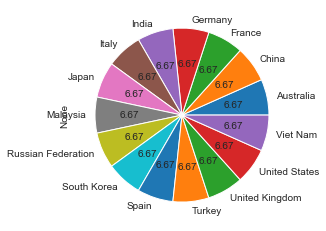

In [643]:
top_countries.groupby('Country').size().plot(kind='pie', autopct='%.2f')